# An Empirical Comparison of Supervised and Self-Supervised Learning

In [1]:
import tqdm
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

from sklearn.svm import SVC
from sklearn.manifold import TSNE

from train import train_encoder, train_ConvNet, TrainArgs
from test import encode_data, plot_tsne, test_conv

from torch.utils.data import Subset

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
%load_ext autoreload
%autoreload 2

## Baseline: convolutional neural network

In [3]:
conv_args = TrainArgs(batchsize = 10)

In [4]:
ConvNet, conv_losses = train_ConvNet(conv_args)

100%|██████████| 170498071/170498071 [00:17<00:00, 9805981.06it/s] 


Extracting ./data/cifar-10-python.tar.gz to ./data
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.302
[epoch: 0, i:   999] avg mini-batch loss: 2.298
[epoch: 0, i:  1499] avg mini-batch loss: 2.287
[epoch: 0, i:  1999] avg mini-batch loss: 2.261
[epoch: 0, i:  2499] avg mini-batch loss: 2.225
[epoch: 0, i:  2999] avg mini-batch loss: 2.182
[epoch: 0, i:  3499] avg mini-batch loss: 2.141
[epoch: 0, i:  3999] avg mini-batch loss: 2.080
[epoch: 0, i:  4499] avg mini-batch loss: 2.046
[epoch: 0, i:  4999] avg mini-batch loss: 2.029
[epoch: 1, i:   499] avg mini-batch loss: 2.011
[epoch: 1, i:   999] avg mini-batch loss: 1.981
[epoch: 1, i:  1499] avg mini-batch loss: 1.965
[epoch: 1, i:  1999] avg mini-batch loss: 1.960
[epoch: 1, i:  2499] avg mini-batch loss: 1.943
[epoch: 1, i:  2999] avg mini-batch loss: 1.927
[epoch: 1, i:  3499] avg mini-batch loss: 1.826
[epoch: 1, i:  3999] avg mini-batch loss: 1.801
[epoch: 1, i:  4499] avg mini-batch loss: 1.733
[epoch: 1, i:  4999] 

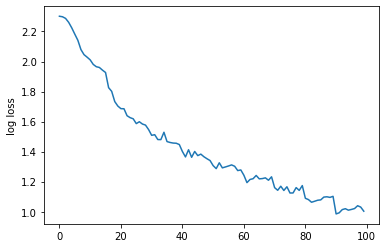

In [5]:
plt.plot(conv_losses);
plt.ylabel('log loss');

In [6]:
print(f'Baseline accuracy of the convolutional model is {test_conv(ConvNet)*100} %')

Files already downloaded and verified
Baseline accuracy of the convolutional model is 56.96 %


## Momentum Contrast

### Pre-Training the Encoder

In [7]:
encoder_args = TrainArgs(epochs = 20)

In [8]:
encoder, enc_losses = train_encoder(encoder_args)

Files already downloaded and verified
Files already downloaded and verified
Train Epoch: 1 	Loss: 0.012988
Train Epoch: 2 	Loss: 0.009195
Train Epoch: 3 	Loss: 0.006901
Train Epoch: 4 	Loss: 0.005250
Train Epoch: 5 	Loss: 0.004040
Train Epoch: 6 	Loss: 0.003190
Train Epoch: 7 	Loss: 0.002604
Train Epoch: 8 	Loss: 0.002170
Train Epoch: 9 	Loss: 0.001850
Train Epoch: 10 	Loss: 0.001631
Train Epoch: 11 	Loss: 0.001435
Train Epoch: 12 	Loss: 0.001315
Train Epoch: 13 	Loss: 0.001201
Train Epoch: 14 	Loss: 0.001099
Train Epoch: 15 	Loss: 0.001035
Train Epoch: 16 	Loss: 0.000980
Train Epoch: 17 	Loss: 0.000927
Train Epoch: 18 	Loss: 0.000897
Train Epoch: 19 	Loss: 0.000854
Train Epoch: 20 	Loss: 0.000822


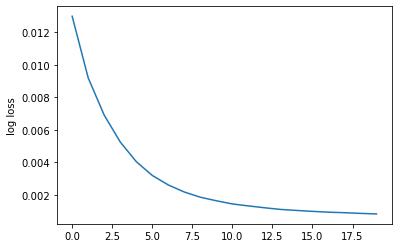

In [9]:
plt.plot(enc_losses);
plt.ylabel('log loss');

### Visualizing Embeddings

To do:
1. Implement multiple training ratios
2. Hyperparameter tuning?
3. Plot the loss functions

In [10]:
data, targets = encode_data()

Files already downloaded and verified


100%|██████████| 10000/10000 [01:43<00:00, 96.60it/s]


In [11]:
ret = TSNE(n_components=2, random_state=0, n_jobs=8).fit_transform(data)

Files already downloaded and verified


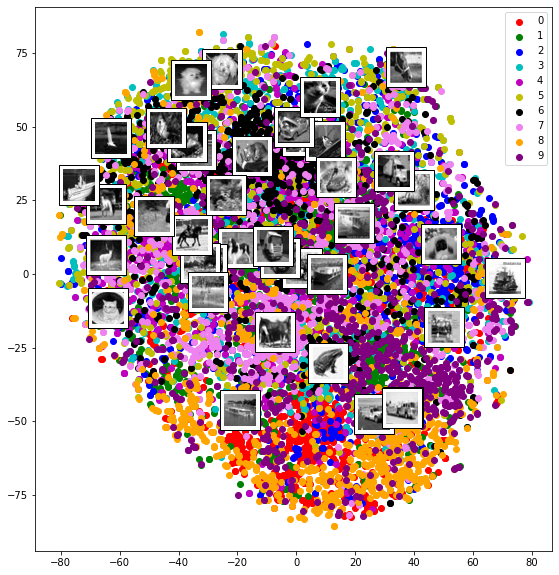

In [12]:
plot_tsne(targets, ret)

### Training SVM on freezed features

In [13]:
X_train, y_train = encode_data(train=True)
X_test, y_test = encode_data(train=False)

Files already downloaded and verified


100%|██████████| 50000/50000 [08:24<00:00, 99.13it/s] 


Files already downloaded and verified


100%|██████████| 10000/10000 [01:40<00:00, 99.45it/s]


In [14]:
svm = SVC(C = 100,  gamma='scale')
svm.fit(X_train, y_train)

SVC(C=100)

In [15]:
svm.score(X_test, y_test)

0.63

### Multiple Runs

In [16]:
# subsample so things run faster
X_train, y_train = encode_data(train=True, subsample = True)
X_test, y_test = encode_data(train=False, subsample = True)

Files already downloaded and verified


100%|██████████| 5000/5000 [00:50<00:00, 98.90it/s]


Files already downloaded and verified


100%|██████████| 1000/1000 [00:10<00:00, 99.05it/s]


In [17]:
conv_args = TrainArgs(batchsize = 10, epochs = 5)

In [18]:
n = 3
conv_errors = []
svm_errors = []
for i in range(n):
    ConvNet, conv_losses = train_ConvNet(conv_args, subsample=True)
    conv_errors.append(test_conv(ConvNet, subsample=True)*100)
    
    svm = SVC(C = 100,  gamma='scale')
    svm.fit(X_train, y_train)   
    svm_errors.append(svm.score(X_test, y_test))

Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.302
[epoch: 1, i:   499] avg mini-batch loss: 2.299
[epoch: 2, i:   499] avg mini-batch loss: 2.286
[epoch: 3, i:   499] avg mini-batch loss: 2.194
[epoch: 4, i:   499] avg mini-batch loss: 2.073
Files already downloaded and verified
Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.302
[epoch: 1, i:   499] avg mini-batch loss: 2.294
[epoch: 2, i:   499] avg mini-batch loss: 2.266
[epoch: 3, i:   499] avg mini-batch loss: 2.192
[epoch: 4, i:   499] avg mini-batch loss: 2.121
Files already downloaded and verified
Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.301
[epoch: 1, i:   499] avg mini-batch loss: 2.293
[epoch: 2, i:   499] avg mini-batch loss: 2.271
[epoch: 3, i:   499] avg mini-batch loss: 2.224
[epoch: 4, i:   499] avg mini-batch loss: 2.114
Files already downloaded and verified


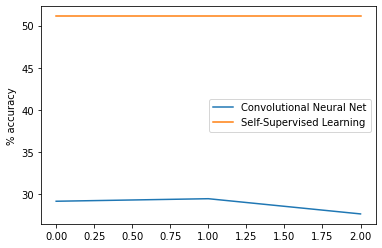

In [19]:
plt.plot(np.array(conv_errors), label="Convolutional Neural Net")
plt.plot(np.array(svm_errors)*100, label="Self-Supervised Learning")
plt.legend()
plt.ylabel('% accuracy')
plt.savefig('./results/comparison.png')

In [20]:
conv_errors

[29.2, 29.5, 27.700000000000003]

In [21]:
svm_errors

[0.511, 0.511, 0.511]

In [22]:
conv_errors

[29.2, 29.5, 27.700000000000003]